In [63]:
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline

In [73]:
y, sr = librosa.load('./data/New_N_001_cut.wav', sr=None)
print(sr)

8000


/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning:

n_fft=2048 is too large for input signal of length=1600



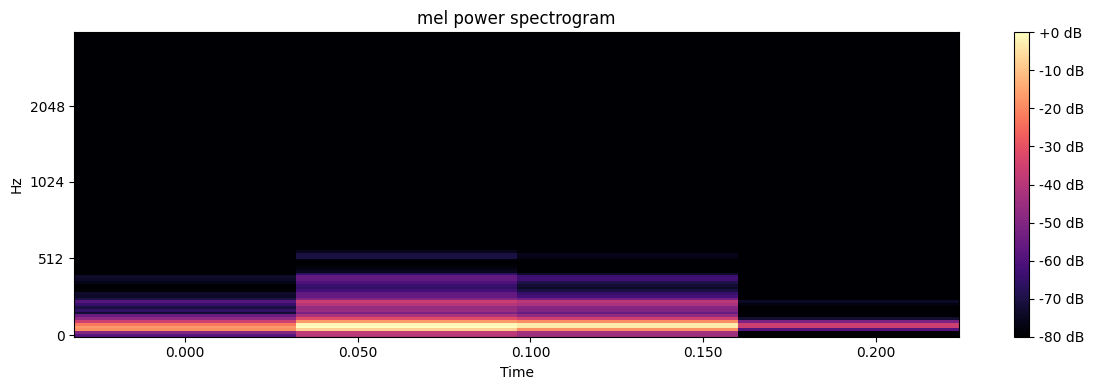

In [74]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(12,4))

librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()


In [76]:
print(len(S))
print(len(S[0]))

128
4


In [44]:
import numpy as np
from scipy.io import wavfile

def cut_wav_file(input_wav_path, output_wav_path, duration_sec):
    # Step 1: Read the WAV file and extract the audio data
    sample_rate, audio_data = wavfile.read(input_wav_path)

    # Step 2: Compute the number of samples required for the desired duration
    samples_required = int(sample_rate * duration_sec)

    # Step 3: Ensure the audio data is at least the required duration
    if len(audio_data) <= samples_required:
        print("The input audio is already shorter than the desired duration.")
        return

    # Step 4: Cut or reshape the audio data to the desired duration
    cut_audio_data = audio_data[:samples_required]

    # Step 5: Write the new audio data to a new WAV file
    wavfile.write(output_wav_path, sample_rate, cut_audio_data)

# Replace 'input_audio.wav' and 'output_audio.wav' with your input and output file paths
input_wav_path = './data/New_N_001.wav'
output_wav_path = './data/New_N_001_cut.wav'

# Set the desired duration in seconds (e.g., 2 seconds)
desired_duration_sec = 0.2

# Call the function to cut/reshape the audio file
cut_wav_file(input_wav_path, output_wav_path, desired_duration_sec)

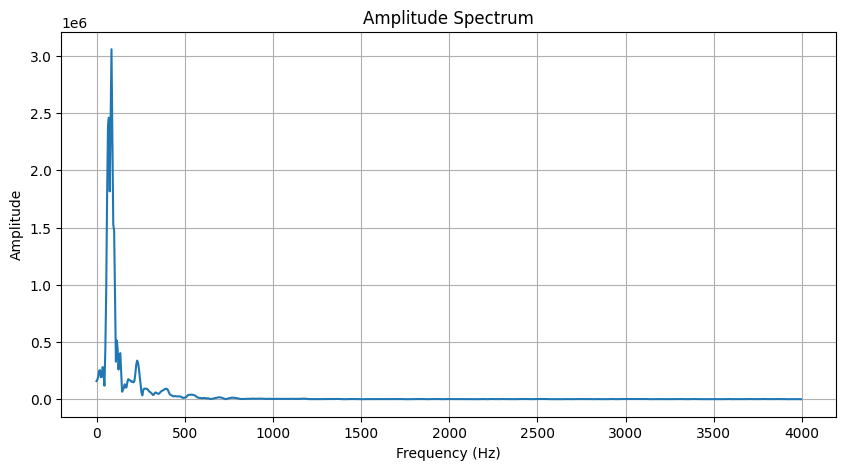

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def plot_amplitude_spectrum(wav_file_path):
    # Step 1: Read the WAV file and extract the audio data
    sample_rate, audio_data = wavfile.read(wav_file_path)

    # Step 2: Compute the Fourier Transform
    frequency_domain = np.fft.fft(audio_data)

    # Step 3: Compute the amplitude spectrum
    amplitude_spectrum = np.abs(frequency_domain)

    # Frequency axis in Hertz
    frequencies = np.fft.fftfreq(len(amplitude_spectrum), d=1/sample_rate)

    # Plotting the amplitude spectrum
    plt.figure(figsize=(10, 5))
    plt.plot(frequencies[:len(frequencies)//2], amplitude_spectrum[:len(amplitude_spectrum)//2])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title('Amplitude Spectrum')
    plt.grid()
    plt.show()

# Replace 'your_wav_file.wav' with the path to your WAV file
wav_file_path = './data/New_N_001_cut.wav'
plot_amplitude_spectrum(wav_file_path)

In [34]:
train_audio_path = './data/'
filename = '/New_N_001.wav'
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)
print(sample_rate, samples.shape)

8000 (16837,)


In [35]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

ValueError: x and y must have same first dimension, but have shapes (8000,) and (16837,)

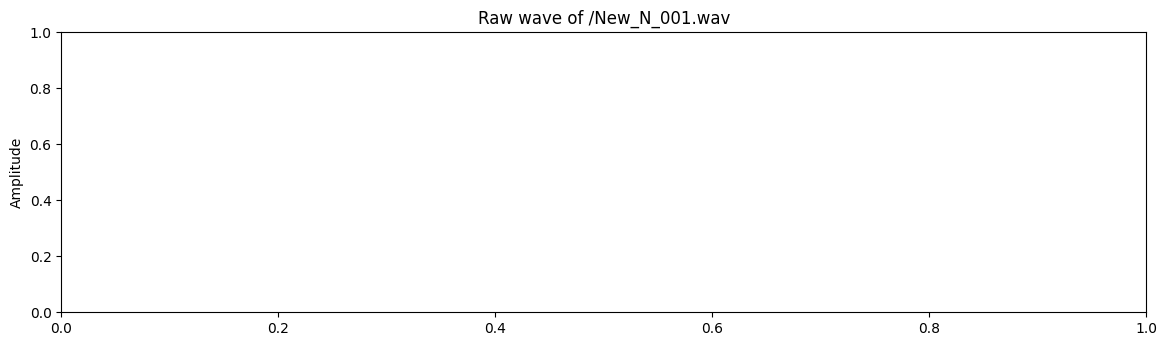

In [36]:
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)